# Processo de modelagem com Machine Learning

<img src = 'https://frnsys.com/assets/hosny/disparity.gif' width =600>


Neste notebook vamos apresentar conceitos e códigos referentes a um processo de modelagem do inicio ao fim, testando o modelo desenvolvido.

Esse processo utiliza das fases do CRISP-DM e serve como uma referência para modelagens futuras.


## Processo básico de modelagem

É composto por 6 passos:

* Fazer a pergunta certa
* Preparar os dados
* Selecionar o algoritmo
* Treinar o modelo
* Testar o modelo
* Implementar o modelo

### Preparando os dados


Antes de iniciar a preparação dos dados necessitamos importar um conjunto de bibliotecas referente a criação de estruturas de dados, entendimento numérico dos tipos de dados além de bibliotecas gráficas.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.available
plt.style.use("seaborn-v0_8-whitegrid")

Agora vamos carregar uma base de dados sobre consumo de cerveja e analisar o quanto o clima impacta nisto

<img src = 'https://media.giphy.com/media/42dsvcMDP3diU/giphy.gif' width=500>

In [3]:
df_cerveja = pd.read_excel("beer_consumption.xlsx")
df_cerveja.head(10)

,data,temp_avg,temp_min,temp_max,precip,weekend,beer_consumption
0,2015-01-01,27.30,23.9,32.5,0.0,False,25461
1,2015-01-02,27.02,24.5,33.5,0.0,False,28972
2,2015-01-03,24.82,22.4,29.9,0.0,True,30814
3,2015-01-04,23.98,21.5,28.6,1.2,True,29799
4,2015-01-05,23.82,21.0,28.3,0.0,False,28900
5,2015-01-06,23.78,20.1,30.5,12.2,False,28218
6,2015-01-07,24.00,19.5,33.7,0.0,False,29732
7,2015-01-08,24.90,NaN,32.8,48.6,False,28397
8,2015-01-09,28.20,21.9,34.0,4.4,False,24886
9,2015-01-10,26.76,22.1,34.2,0.0,True,37937


Vamos ver as estatísticas descritivas desta base

In [5]:
df_cerveja.describe()

,data,temp_avg,temp_min,temp_max,precip,beer_consumption
count,365,361.000000,363.000000,362.000000,365.000000,365.000000
mean,2015-07-02 00:00:00,21.101385,17.396970,26.480663,5.196712,25401.367123
min,2015-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,14343.000000
25%,2015-04-02 00:00:00,18.920000,15.200000,23.725000,0.000000,22008.000000
50%,2015-07-02 00:00:00,21.360000,17.900000,26.900000,0.000000,24867.000000
75%,2015-10-01 00:00:00,23.280000,19.550000,29.400000,3.200000,28631.000000
max,2015-12-31 00:00:00,28.860000,24.500000,36.500000,94.800000,37937.000000
std,NaN,3.546618,2.969405,4.758531,12.417844,4399.142703


In [7]:
df_cerveja.count()

data                365
temp_avg            361
temp_min            363
temp_max            362
precip              365
weekend             363
beer_consumption    365
dtype: int64

In [9]:
df_cerveja.corr()

,data,temp_avg,temp_min,temp_max,precip,weekend,beer_consumption
data,1.000000,-0.144410,-0.127932,-0.029035,0.007490,-0.011289,0.043541
temp_avg,-0.144410,1.000000,0.678633,0.735339,0.026834,-0.060993,0.503227
temp_min,-0.127932,0.678633,1.000000,0.531704,0.094701,-0.040564,0.345033
temp_max,-0.029035,0.735339,0.531704,1.000000,-0.071084,-0.029149,0.587027
precip,0.007490,0.026834,0.094701,-0.071084,1.000000,0.005200,-0.193784
weekend,-0.011289,-0.060993,-0.040564,-0.029149,0.005200,1.000000,0.505871
beer_consumption,0.043541,0.503227,0.345033,0.587027,-0.193784,0.505871,1.000000


<Axes: >

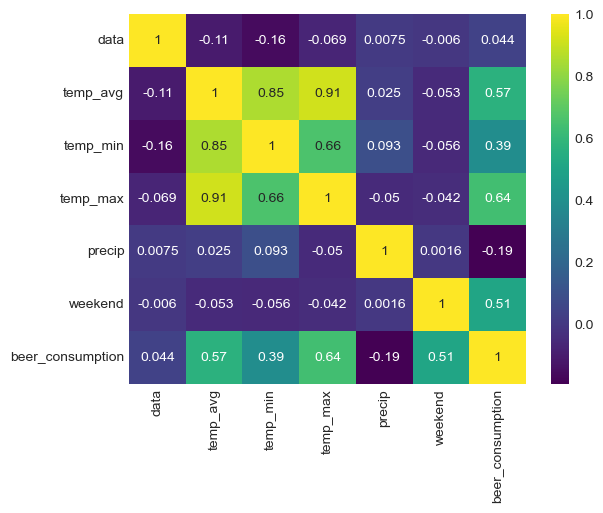

In [123]:
# sns.heatmap(df_cerveja.corr())
# sns.heatmap(df_cerveja.corr(), cmap='viridis')
sns.heatmap(df_cerveja.corr(), cmap='viridis', annot=True)

Não foram encontrados colunas correlacionadas o suficiente para removê-las.

### Compreendendo relações e correlações de variáveis

sns.lmplot()

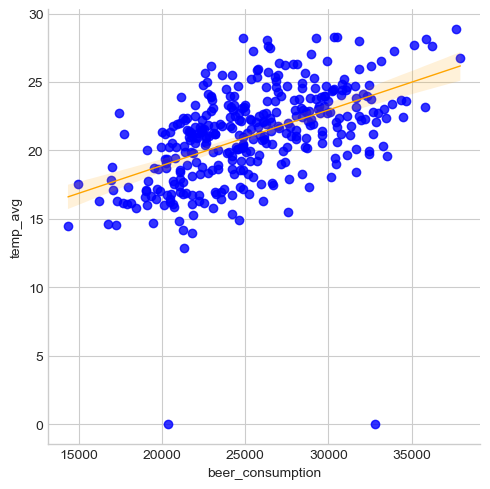

In [13]:
sns.lmplot(data=df_cerveja, x="beer_consumption", y="temp_avg",
          scatter_kws={"marker":"x", "color":"blue"},
          line_kws={"linewidth":1, "color": "orange"})

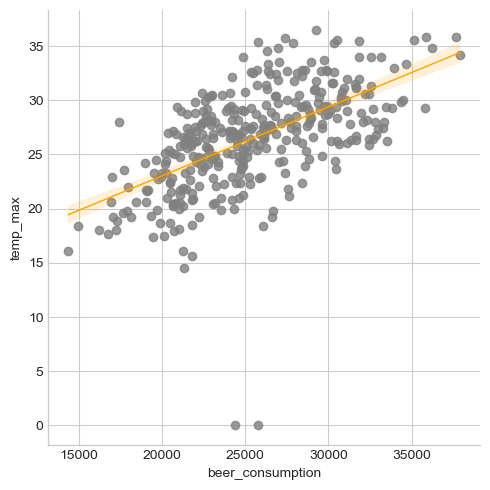

In [15]:
sns.lmplot(data=df_cerveja, x="beer_consumption", y="temp_max",
          scatter_kws={"marker":"x", "color":"gray"},
          line_kws={"linewidth":1, "color": "orange"})

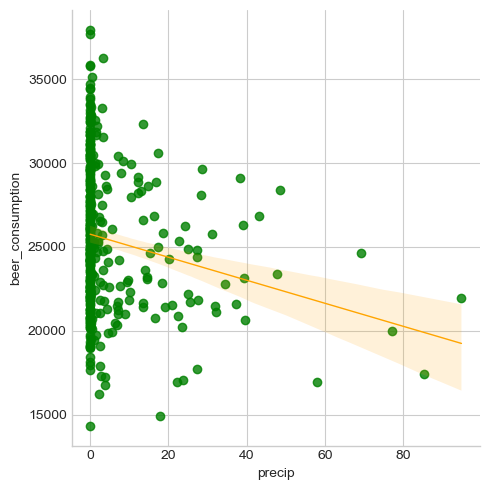

In [17]:
sns.lmplot(data=df_cerveja, x="precip", y="beer_consumption",
          scatter_kws={"marker":"x", "color":"green"},
          line_kws={"linewidth":1, "color": "orange"})

### Mapear dados em label para numéricos

In [19]:
df_cerveja.head()

,data,temp_avg,temp_min,temp_max,precip,weekend,beer_consumption
0,2015-01-01,27.30,23.9,32.5,0.0,False,25461
1,2015-01-02,27.02,24.5,33.5,0.0,False,28972
2,2015-01-03,24.82,22.4,29.9,0.0,True,30814
3,2015-01-04,23.98,21.5,28.6,1.2,True,29799
4,2015-01-05,23.82,21.0,28.3,0.0,False,28900


In [21]:
# Categorização
class_weekend = {True: 1, False: 0}
df_cerveja["weekend"] = df_cerveja["weekend"].map(class_weekend)

In [23]:
df_cerveja.head(5)

,data,temp_avg,temp_min,temp_max,precip,weekend,beer_consumption
0,2015-01-01,27.30,23.9,32.5,0.0,0.0,25461
1,2015-01-02,27.02,24.5,33.5,0.0,0.0,28972
2,2015-01-03,24.82,22.4,29.9,0.0,1.0,30814
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29799
4,2015-01-05,23.82,21.0,28.3,0.0,0.0,28900


### Busca por dados nulos e inválidos

In [25]:
df_cerveja.isnull().any()

data                False
temp_avg             True
temp_min             True
temp_max             True
precip              False
weekend              True
beer_consumption    False
dtype: bool

In [27]:
df_cerveja[df_cerveja["temp_avg"].isnull()]

,data,temp_avg,temp_min,temp_max,precip,weekend,beer_consumption
168,2015-06-18,NaN,15.8,26.2,0.0,0.0,24534
181,2015-07-01,NaN,16.2,20.5,0.0,0.0,20824
309,2015-11-06,NaN,18.0,22.8,0.0,0.0,20575
314,2015-11-11,NaN,19.8,32.7,0.0,0.0,29569


In [29]:
df_cerveja[df_cerveja["temp_min"].isnull()]

,data,temp_avg,temp_min,temp_max,precip,weekend,beer_consumption
7,2015-01-08,24.90,NaN,32.8,48.6,0.0,28397
116,2015-04-27,19.82,NaN,24.9,0.0,0.0,21838


In [31]:
df_cerveja[df_cerveja["temp_max"].isnull()]

,data,temp_avg,temp_min,temp_max,precip,weekend,beer_consumption
98,2015-04-09,19.40,15.9,NaN,0.0,0.0,20298
165,2015-06-15,16.02,13.1,NaN,0.0,0.0,19119
237,2015-08-26,18.92,14.8,NaN,0.6,0.0,23357


In [33]:
df_cerveja[df_cerveja["weekend"].isnull()]

,data,temp_avg,temp_min,temp_max,precip,weekend,beer_consumption
21,2015-01-22,21.74,19.2,0.0,31.0,NaN,25795
27,2015-01-28,25.68,20.1,29.9,4.9,NaN,22603


Temperatura média pode ser calculada entre a temperatura máxima e mínima

In [36]:
df_cerveja_temp_avg_null = df_cerveja[df_cerveja["temp_avg"].isnull()].copy()
df_cerveja_temp_avg_null

,data,temp_avg,temp_min,temp_max,precip,weekend,beer_consumption
168,2015-06-18,NaN,15.8,26.2,0.0,0.0,24534
181,2015-07-01,NaN,16.2,20.5,0.0,0.0,20824
309,2015-11-06,NaN,18.0,22.8,0.0,0.0,20575
314,2015-11-11,NaN,19.8,32.7,0.0,0.0,29569


In [38]:
df_cerveja_temp_avg_null["temp_avg"] = (df_cerveja["temp_max"] + df_cerveja["temp_min"])/2
df_cerveja_temp_avg_null

,data,temp_avg,temp_min,temp_max,precip,weekend,beer_consumption
168,2015-06-18,21.00,15.8,26.2,0.0,0.0,24534
181,2015-07-01,18.35,16.2,20.5,0.0,0.0,20824
309,2015-11-06,20.40,18.0,22.8,0.0,0.0,20575
314,2015-11-11,26.25,19.8,32.7,0.0,0.0,29569


In [40]:
# outra forma de retornar a média da coluna
df_cerveja["temp_avg"].mean()

21.101385041551247

In [42]:
# df_cerveja["temp_avg"] = df_cerveja["temp_avg"].replace(np.nan,(df_cerveja["temp_max"] + df_cerveja["temp_min"])/2)
df_cerveja["temp_avg"] = df_cerveja["temp_avg"].replace(np.nan,df_cerveja["temp_avg"].mean())

In [44]:
df_cerveja.loc[[168,181,309,314]]

,data,temp_avg,temp_min,temp_max,precip,weekend,beer_consumption
168,2015-06-18,21.101385,15.8,26.2,0.0,0.0,24534
181,2015-07-01,21.101385,16.2,20.5,0.0,0.0,20824
309,2015-11-06,21.101385,18.0,22.8,0.0,0.0,20575
314,2015-11-11,21.101385,19.8,32.7,0.0,0.0,29569


In [46]:
df_cerveja["temp_min"] = df_cerveja["temp_min"].replace(np.nan,df_cerveja["temp_min"].mean())

In [48]:
df_cerveja.loc[[7,116]]

,data,temp_avg,temp_min,temp_max,precip,weekend,beer_consumption
7,2015-01-08,24.90,17.39697,32.8,48.6,0.0,28397
116,2015-04-27,19.82,17.39697,24.9,0.0,0.0,21838


In [50]:
df_cerveja.loc[[98, 165, 237]]

,data,temp_avg,temp_min,temp_max,precip,weekend,beer_consumption
98,2015-04-09,19.40,15.9,NaN,0.0,0.0,20298
165,2015-06-15,16.02,13.1,NaN,0.0,0.0,19119
237,2015-08-26,18.92,14.8,NaN,0.6,0.0,23357


In [52]:
df_cerveja["temp_max"] = df_cerveja["temp_max"].replace(np.nan, df_cerveja["temp_max"].mean())

In [54]:
df_cerveja.loc[[98, 165, 237]]

,data,temp_avg,temp_min,temp_max,precip,weekend,beer_consumption
98,2015-04-09,19.40,15.9,26.480663,0.0,0.0,20298
165,2015-06-15,16.02,13.1,26.480663,0.0,0.0,19119
237,2015-08-26,18.92,14.8,26.480663,0.6,0.0,23357


In [56]:
# calcular a moda do final de semana
df_cerveja["weekend"].mode()

0    0.0
Name: weekend, dtype: float64

In [58]:
df_cerveja["weekend"] = df_cerveja["weekend"].replace(np.nan, df_cerveja["weekend"].mode()[0])

In [60]:
df_cerveja.loc[[21,27]]

,data,temp_avg,temp_min,temp_max,precip,weekend,beer_consumption
21,2015-01-22,21.74,19.2,0.0,31.0,0.0,25795
27,2015-01-28,25.68,20.1,29.9,4.9,0.0,22603


In [62]:
df_cerveja.isnull().any()

data                False
temp_avg            False
temp_min            False
temp_max            False
precip              False
weekend             False
beer_consumption    False
dtype: bool

**Verifcar ocorrência de números iguais a 0, que seria inválido**

In [65]:
(df_cerveja == 0).any()

data                False
temp_avg             True
temp_min             True
temp_max             True
precip               True
weekend              True
beer_consumption    False
dtype: bool

In [67]:
df_cerveja[df_cerveja["temp_avg"] == 0]

,data,temp_avg,temp_min,temp_max,precip,weekend,beer_consumption
323,2015-11-20,0.0,19.6,27.0,6.8,0.0,20332
339,2015-12-06,0.0,20.6,28.0,0.1,1.0,32780


In [69]:
df_cerveja[df_cerveja["temp_min"] == 0]

,data,temp_avg,temp_min,temp_max,precip,weekend,beer_consumption
13,2015-01-14,25.96,0.0,34.0,1.6,0.0,31825


In [71]:
df_cerveja[df_cerveja["temp_max"] == 0]

,data,temp_avg,temp_min,temp_max,precip,weekend,beer_consumption
21,2015-01-22,21.74,19.2,0.0,31.0,0.0,25795
113,2015-04-24,22.52,19.3,0.0,0.0,0.0,24388


In [73]:
df_cerveja.shape

(365, 7)

In [75]:
df_cerveja[df_cerveja["precip"] == 0].head(10)

,data,temp_avg,temp_min,temp_max,precip,weekend,beer_consumption
0,2015-01-01,27.30,23.9,32.5,0.0,0.0,25461
1,2015-01-02,27.02,24.5,33.5,0.0,0.0,28972
2,2015-01-03,24.82,22.4,29.9,0.0,1.0,30814
4,2015-01-05,23.82,21.0,28.3,0.0,0.0,28900
6,2015-01-07,24.00,19.5,33.7,0.0,0.0,29732
9,2015-01-10,26.76,22.1,34.2,0.0,1.0,37937
11,2015-01-12,25.96,21.4,35.4,0.0,0.0,25743
16,2015-01-17,28.86,22.0,35.8,0.0,1.0,37690
17,2015-01-18,28.26,23.4,35.6,0.0,1.0,30524
20,2015-01-21,25.32,22.7,30.9,0.0,0.0,29130


In [77]:
df_cerveja[df_cerveja["weekend"] == 0].head(10)
#df_cerveja[df_cerveja["weekend"] == 0].head(10).sort_values(by='data', ascending=False)

,data,temp_avg,temp_min,temp_max,precip,weekend,beer_consumption
0,2015-01-01,27.30,23.90000,32.5,0.0,0.0,25461
1,2015-01-02,27.02,24.50000,33.5,0.0,0.0,28972
4,2015-01-05,23.82,21.00000,28.3,0.0,0.0,28900
5,2015-01-06,23.78,20.10000,30.5,12.2,0.0,28218
6,2015-01-07,24.00,19.50000,33.7,0.0,0.0,29732
7,2015-01-08,24.90,17.39697,32.8,48.6,0.0,28397
8,2015-01-09,28.20,21.90000,34.0,4.4,0.0,24886
11,2015-01-12,25.96,21.40000,35.4,0.0,0.0,25743
12,2015-01-13,25.52,21.20000,34.8,0.8,0.0,26990
13,2015-01-14,25.96,0.00000,34.0,1.6,0.0,31825


Precipitação e Weekend podem ser igual a 0.

Utilizar mesma estratégia anterior para os demais atributos.

In [81]:
df_cerveja["temp_avg"] = df_cerveja["temp_avg"].replace(0, df_cerveja["temp_avg"].mean())

In [83]:
df_cerveja["temp_min"] = df_cerveja["temp_min"].replace(0, df_cerveja["temp_min"].mean())

In [85]:
df_cerveja["temp_max"] = df_cerveja["temp_max"].replace(0, df_cerveja["temp_max"].mean())

In [87]:
(df_cerveja == 0).any()

data                False
temp_avg            False
temp_min            False
temp_max            False
precip               True
weekend              True
beer_consumption    False
dtype: bool

### Separando dados de treinamento e teste

In [99]:
from sklearn.model_selection import train_test_split

feature_col_names = ['temp_max', 'precip', 'weekend']
predicted_class_names = ['beer_consumption']

X = df_cerveja[feature_col_names].values
y = df_cerveja[predicted_class_names].values
split_test_size = 0.30

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, random_state=42)

In [101]:
print("{0:0.2f}% in training set".format((len(X_train)/len(df_cerveja.index)) * 100))
print("{0:0.2f}% in test set".format((len(X_test)/len(df_cerveja.index)) * 100))

69.86% in training set
30.14% in test set


In [103]:
from sklearn import linear_model

lr_model = linear_model.LinearRegression()
lr_model.fit(X_train, y_train.ravel())

LinearRegression()

Testando valores par verificar a performance

In [105]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = lr_model.predict(X_test)

print('R2 score: %.2f' % r2_score(y_test, y_pred))
print('R2 score: %.2f' % lr_model.score(X_test, y_test))

R2 score: 0.74
R2 score: 0.74


R2 score está na faixa esperada de >= 70%

Simulação de um caso onde se espera maior consumo, clima quente, 35 graus C, sem chuva e é final de semana.

In [107]:
predict_value = [[35, 0, 1]]
lr_model.predict(predict_value)

array([35092.25246658])

Simulação de um caso onde se espera um consumo menor que o de cima, clima quente, 35 graus C, sem chuva mas em dia de semana.

In [109]:
predict_value = [[35, 0, 0]]
lr_model.predict(predict_value)

array([29753.3647769])

Simulação de um caso onde se espera um consumo menor que o de cima, clima quente, 35 graus C, com chuva e em dia de semana.

In [111]:
predict_value = [[35, 20, 0]]
lr_model.predict(predict_value)

array([28689.99450697])

Pior cenário, baixo consumo, frio (10 graus C), chovendo e em dia de semana.

In [113]:
predict_value = [[10, 20, 0]]
lr_model.predict(predict_value)

array([12008.88877202])

### Salvando modelo

In [115]:
#from sklearn.externals import joblib
import joblib
joblib.dump(lr_model, 'lr_model.pkl')

['lr_model.pkl']

In [117]:
lr_carregar_modelo = joblib.load('lr_model.pkl')

In [119]:
novos_valores = [[10, 20, 0]]
lr_carregar_modelo.predict(novos_valores)

array([12008.88877202])